
### **Analyse Univariée: figures indispensables**

**Objectif**

- Comprendre la distribution d'une variable.
- Identifier les anomalies (asymétrie, dispersion, valeurs extrêmes).
- Produire des visuels lisibles et interprétables.

**Sommaire**

1. Imports et données
2. Typologie des variables
3. Analyse d'une variable catégorielle
4. Analyse d'une variable numérique
5. Conclusion


# Imports et données

Nous utilisons le dataset `tips` de Seaborn pour illustrer les graphiques d'analyse univariée.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")
df.head(3)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


# Typologie des variables

- Variables **catégorielles**: `sex`, `smoker`, `day`, `time`
- Variables **numériques**: `total_bill`, `tip`, `size`

Cette distinction détermine le type de visualisation à utiliser.


In [6]:
categorical_cols = ["sex", "smoker", "day", "time"]
numeric_cols = ["total_bill", "tip", "size"]

# Analyse d'une variable catégorielle

## Tableau de fréquences

Toujours commencer par:

- les effectifs,
- les proportions (%).

Cela permet de détecter immédiatement un éventuel déséquilibre entre modalités.


In [7]:
freq = df["day"].value_counts(dropna=False)
prop = df["day"].value_counts(normalize=True, dropna=False).mul(100).round(2)

pd.DataFrame({"effectif": freq, "pourcentage": prop})

,effectif,pourcentage
day,,
Sat,87,35.66
Sun,76,31.15
Thur,62,25.41
Fri,19,7.79


## Barplot (countplot)

Le barplot permet de visualiser rapidement la répartition des catégories.

À vérifier lors de la lecture:

- modalité dominante,
- catégories sous-représentées,
- impact potentiel sur l'analyse ou la modélisation.


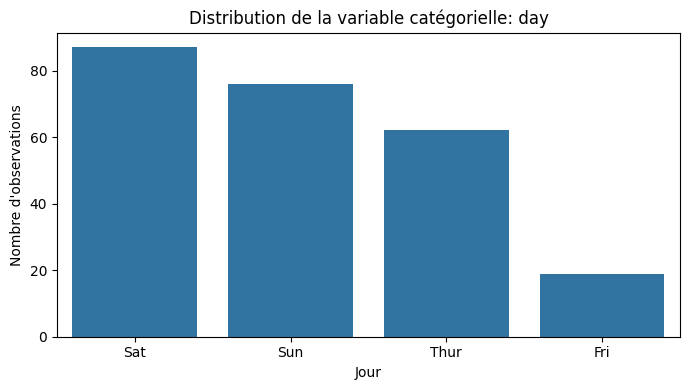

In [ ]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x="day", order=df["day"].value_counts().index)
ax.set_title("Distribution de la variable catégorielle: day")
ax.set_xlabel("Jour")
ax.set_ylabel("Nombre d'observations")
plt.show()


## Interprétation (exemple)

La distribution est déséquilibrée: près de **67%** des observations sont concentrées sur le week-end (`Sat` + `Sun`).
Alors si le jour influence la variable étudiée, les résultats globaux peuvent être biaisés.

# Analyse d'une variable numérique
## Statistiques descriptives

Les indicateurs de base à commenter:

- tendance centrale (moyenne, médiane),
- dispersion (écart-type, IQR),
- valeurs minimale et maximale.

In [ ]:
df["tip"].describe().to_frame(name="tip")

,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


## Histogramme + KDE

Ce graphique montre la forme de la distribution:

- concentration des valeurs,
- asymétrie éventuelle,
- présence de queues longues.

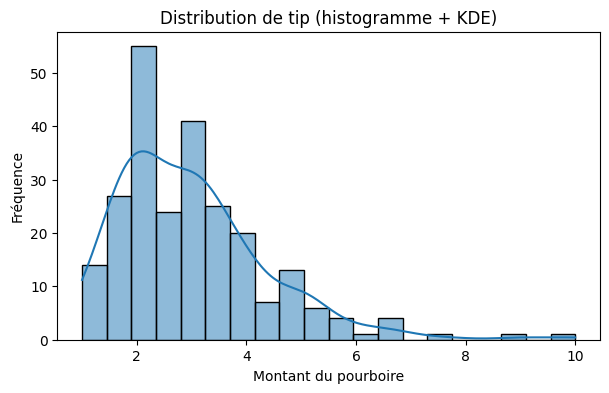

In [19]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x="tip", bins=20, kde=True)
plt.title("Distribution de tip (histogramme + KDE)")
plt.xlabel("Montant du pourboire")
plt.ylabel("Fréquence")
plt.show()


## Boxplot

Le boxplot résume rapidement:

- médiane,
- quartiles,
- valeurs atypiques (outliers).

Il est particulièrement utile pour comparer plusieurs variables ou segments.

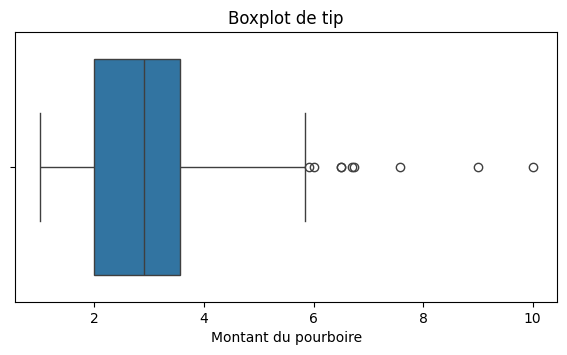

In [17]:
plt.figure(figsize=(7, 3.5))
sns.boxplot(data=df, x="tip")
plt.title("Boxplot de tip")
plt.xlabel("Montant du pourboire")
plt.show()


## Violin plot

Le violin plot combine:

- la logique du boxplot,
- la densité de distribution.

Lecture pratique:

- zones larges = forte concentration de données,
- zones fines = faible concentration,
- asymétrie visible entre bas et haut de distribution.

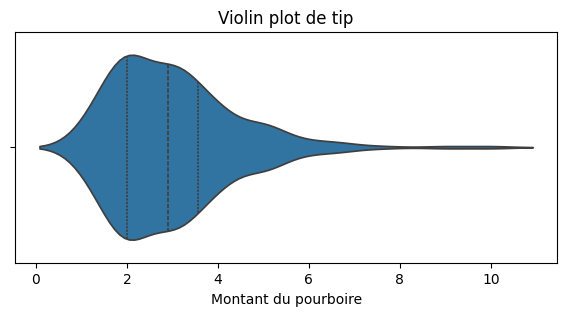

In [20]:
plt.figure(figsize=(7, 3))
sns.violinplot(data=df, x="tip", inner="quartile")
plt.title("Violin plot de tip")
plt.xlabel("Montant du pourboire")
plt.show()


- **Ce que je vois:** distribution asymétrique à droite.
- **Ce que ça implique:** la moyenne peut être tirée vers le haut.
- **Action recommandée:** suivre la médiane et l'IQR, puis contrôler les valeurs extrêmes.


# Conclusion

Avant toute modélisation, une bonne analyse univariée permet de:

- mieux comprendre les données,
- éviter des interprétations trompeuses,
- choisir les bons indicateurs statistiques.